Lets create some example code for using the package I've written.

In [1]:
import contingency_space
import numpy as np

from contingency_space.confusion_matrix import ConfusionMatrix
from contingency_space.contingency_space import ContingencySpace
from contingency_space.imbalance_sensitivity import imbalance_sensitivity
from contingency_space.cm_generator import CMGenerator

The glue that holds all of these pieces together is the Confusion Matrix, which can be constructed like so:

In [2]:
#Where the keys can lists come together to represent a row of a confusion matrix. 
matrix = ConfusionMatrix({
    't': [500, 500],
    'f': [500, 500]
})

It can also be built row by row:

In [3]:
matrix = ConfusionMatrix()
matrix.add_class('f', [500, 500])
matrix.add_class('f', [500, 500])

print(matrix.array())

[[500 500]]


We will use this baseline accuracy function for this notebook. You can build your own functions, so long as they take a confusion matrix as input and output a value.

In [4]:
def accuracy(cm: ConfusionMatrix) -> float:
    matrix = cm.array()
    
    true_values = np.sum(matrix.diagonal())
    total_values = np.sum(matrix)
    
    
    result = true_values / total_values
    
    return result

The matrix contains a few functions that can be useful. We will come back to this later. Let's take a look at the class I put together to demonstrate their usage:

In [5]:
#Let's generate some data to generate some confusion matrices.
num_classes: int = 2
total_instances: int = 1000
instances_per_class: dict[str, int] = {'t': 500, 'f': 500} #This is the number of total instances per class, not necessarily the hits, however.

generator = CMGenerator(num_classes, instances_per_class) #here we pass this data to the constructor.

To generate the matrices, we will tell the generator the 
"granularity" of matrices we wish to generate. 
What this represents is the number of points on each axis we wish to generate.
So for instance, with a binary classification problem and a granularity of 10, we will generate 100 total matrices 10^n for n number of classes.

For example, if a given class has 100 instances, and we give a granularity of 10, these points will be generated for that axis: 10% correct, 20% correct, 30%, etc.

In [6]:
#granularity: The resolution at which we will generate matrices. 
granularity: int = 10
generator.generate_cms(granularity)

[     t    f
 t    0  500
 f  500    0,
      t    f
 t    0  500
 f  445   55,
      t    f
 t    0  500
 f  389  111,
      t    f
 t    0  500
 f  334  166,
      t    f
 t    0  500
 f  278  222,
      t    f
 t    0  500
 f  223  277,
      t    f
 t    0  500
 f  167  333,
      t    f
 t    0  500
 f  112  388,
     t    f
 t   0  500
 f  56  444,
    t    f
 t  0  500
 f  0  500,
      t    f
 t   55  445
 f  500    0,
      t    f
 t   55  445
 f  445   55,
      t    f
 t   55  445
 f  389  111,
      t    f
 t   55  445
 f  334  166,
      t    f
 t   55  445
 f  278  222,
      t    f
 t   55  445
 f  223  277,
      t    f
 t   55  445
 f  167  333,
      t    f
 t   55  445
 f  112  388,
     t    f
 t  55  445
 f  56  444,
     t    f
 t  55  445
 f   0  500,
      t    f
 t  111  389
 f  500    0,
      t    f
 t  111  389
 f  445   55,
      t    f
 t  111  389
 f  389  111,
      t    f
 t  111  389
 f  334  166,
      t    f
 t  111  389
 f  278  222,
      t    f
 t

We can now view the matrices generated by using CMGenerator.show_all_cms().

In [7]:
generator.show_all_cms()

--[0]-----------------------------------------
     t    f
t    0  500
f  500    0
--[1]-----------------------------------------
     t    f
t    0  500
f  445   55
--[2]-----------------------------------------
     t    f
t    0  500
f  389  111
--[3]-----------------------------------------
     t    f
t    0  500
f  334  166
--[4]-----------------------------------------
     t    f
t    0  500
f  278  222
--[5]-----------------------------------------
     t    f
t    0  500
f  223  277
--[6]-----------------------------------------
     t    f
t    0  500
f  167  333
--[7]-----------------------------------------
     t    f
t    0  500
f  112  388
--[8]-----------------------------------------
    t    f
t   0  500
f  56  444
--[9]-----------------------------------------
   t    f
t  0  500
f  0  500
--[10]-----------------------------------------
     t    f
t   55  445
f  500    0
--[11]-----------------------------------------
     t    f
t   55  445
f  445   55
--[12]-----

Now, lets do the same thing for an imbalanced problem. 

In [8]:
num_classes = 2
num_classes: int = 2
total_instances: int = 1300
instances_per_class: dict[str, int] = {'t': 800, 'f': 500}

generator = CMGenerator(num_classes, instances_per_class)

In [9]:
#granularity: The resolution at which we will generate matrices. 
granularity: int = 10
generator.generate_cms(granularity)

[     t    f
 t    0  800
 f  500    0,
      t    f
 t    0  800
 f  445   55,
      t    f
 t    0  800
 f  389  111,
      t    f
 t    0  800
 f  334  166,
      t    f
 t    0  800
 f  278  222,
      t    f
 t    0  800
 f  223  277,
      t    f
 t    0  800
 f  167  333,
      t    f
 t    0  800
 f  112  388,
     t    f
 t   0  800
 f  56  444,
    t    f
 t  0  800
 f  0  500,
      t    f
 t   88  712
 f  500    0,
      t    f
 t   88  712
 f  445   55,
      t    f
 t   88  712
 f  389  111,
      t    f
 t   88  712
 f  334  166,
      t    f
 t   88  712
 f  278  222,
      t    f
 t   88  712
 f  223  277,
      t    f
 t   88  712
 f  167  333,
      t    f
 t   88  712
 f  112  388,
     t    f
 t  88  712
 f  56  444,
     t    f
 t  88  712
 f   0  500,
      t    f
 t  177  623
 f  500    0,
      t    f
 t  177  623
 f  445   55,
      t    f
 t  177  623
 f  389  111,
      t    f
 t  177  623
 f  334  166,
      t    f
 t  177  623
 f  278  222,
      t    f
 t

In [10]:
generator.show_all_cms()

--[0]-----------------------------------------
     t    f
t    0  800
f  500    0
--[1]-----------------------------------------
     t    f
t    0  800
f  445   55
--[2]-----------------------------------------
     t    f
t    0  800
f  389  111
--[3]-----------------------------------------
     t    f
t    0  800
f  334  166
--[4]-----------------------------------------
     t    f
t    0  800
f  278  222
--[5]-----------------------------------------
     t    f
t    0  800
f  223  277
--[6]-----------------------------------------
     t    f
t    0  800
f  167  333
--[7]-----------------------------------------
     t    f
t    0  800
f  112  388
--[8]-----------------------------------------
    t    f
t   0  800
f  56  444
--[9]-----------------------------------------
   t    f
t  0  800
f  0  500
--[10]-----------------------------------------
     t    f
t   88  712
f  500    0
--[11]-----------------------------------------
     t    f
t   88  712
f  445   55
--[12]-----

As we've shown, the new Confusion Matrix class, along with the CMGenerator, can be used to show confusion matrices of both balanced and unbalanced binary classification problems. But what about multi-class classification? It can handle that too:

In [11]:
num_classes = 5
total_instances = 6000
instances_per_class = {'a': 1200, 'b': 800, 'c': 600, 'd': 1800, 'e': 1600}

generator = CMGenerator(num_classes, instances_per_class)

In [12]:
generator.generate_cms(5)
generator.show_all_cms()

--[0]-----------------------------------------
     a    b    c    d    e
a    0  300  300  300  300
b  200    0  200  200  200
c  150  150    0  150  150
d  450  450  450    0  450
e  400  400  400  400    0
--[1]-----------------------------------------
     a    b    c    d    e
a    0  300  300  300  300
b  200    0  200  200  200
c  150  150    0  150  150
d  450  450  450    0  450
e  300  300  300  300  400
--[2]-----------------------------------------
     a    b    c    d    e
a    0  300  300  300  300
b  200    0  200  200  200
c  150  150    0  150  150
d  450  450  450    0  450
e  200  200  200  200  800
--[3]-----------------------------------------
     a    b    c    d     e
a    0  300  300  300   300
b  200    0  200  200   200
c  150  150    0  150   150
d  450  450  450    0   450
e  100  100  100  100  1200
--[4]-----------------------------------------
     a    b    c    d     e
a    0  300  300  300   300
b  200    0  200  200   200
c  150  150    0  150   150

As we have shown, the Confusion Matrix is capable of handling multi-class, as well as imbalanced, multi-class classification data. Let's take a deeper look into the confusion matrix itself. 

Let's hone in on a single matrix. 

In [13]:
matrix = generator.all_cms[647]

print(matrix)

     a    b    c     d    e
a  300  225  225   225  225
b  200    0  200   200  200
c  150  150    0   150  150
d    0    0    0  1800    0
e  200  200  200   200  800


In [14]:
#We can print the total instances it predicted correctly:
matrix.get_total_true()

np.int64(2900)

In [15]:
#We can also get the number of times it guessed a specific class incorrectly:
print(matrix.get_wrong_classifications('a'))

550


In [16]:
#Or the number of times it guessed a different class than the given one:
print(matrix.get_missed_classifications('a'))

900


If left blank, these functions will return a list of the number of each of their values per class:

In [17]:
#This will be the sum of each column, except for the diagonal.
print(matrix.get_wrong_classifications())

{'a': np.int64(550), 'b': np.int64(575), 'c': np.int64(625), 'd': np.int64(775), 'e': np.int64(575)}


In [18]:
#This will be the sum of each row, except for the diagonal.
print(matrix.get_missed_classifications())

[900 800 600   0 800]


We can also grab the rate at which the model predicted each class successfully:

In [19]:
print(matrix.vector(metric=accuracy))

(np.float64(0.5), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.25), np.float64(0.48333333333333334))


We can also specify another data type we wish to use other than tuple:

In [20]:
print(matrix.vector(return_type=list))

[np.float64(0.5), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.25)]


There is also a built-in normalization function:

In [21]:
print(matrix)

print('\n')

matrix.normalize()
print(matrix)

     a    b    c     d    e
a  300  225  225   225  225
b  200    0  200   200  200
c  150  150    0   150  150
d    0    0    0  1800    0
e  200  200  200   200  800


       a       b       c       d       e
a  0.250  0.1875  0.1875  0.1875  0.1875
b  0.250  0.0000  0.2500  0.2500  0.2500
c  0.250  0.2500  0.0000  0.2500  0.2500
d  0.000  0.0000  0.0000  1.0000  0.0000
e  0.125  0.1250  0.1250  0.1250  0.5000


Let's explore using these matrices to generate a contingency space:

In [22]:
#We pass in a dictionary consisting of the matrices we wish to use for the contingency space. 
cs = ContingencySpace({
    '1': ConfusionMatrix({
        't': [500, 600], 
        'f': [500, 500]
    }),
    '2': ConfusionMatrix({
        't': [600, 500], 
        'f': [600, 400]
    }),
    '3': ConfusionMatrix({
        't': [700, 400], 
        'f': [700, 300]
    }),
    '4': ConfusionMatrix({
        't': [800, 300], 
        'f': [800, 200]
    }),
    '5': ConfusionMatrix({
        't': [900, 200], 
        'f': [900, 100]
    }),
    '6': ConfusionMatrix({
        't': [1000, 100], 
        'f': [1000, 100]
    })
})

**Learning paths (2D and 3D)**

Now that we've built the contingency space, we can take a look into some of the data contained within. For example, it is capable of calculating the learning paths of the matrices in 2D and 3D (Keep in mind this is for BINARY classification):

In [23]:
print("Learning path (2D):")
print(str(cs.learning_path_length_2D(('1', '6'))) + "\n")

print("Learning path (3D):")
print(str(cs.learning_path_length_3D(('1', '6'), accuracy)))

Learning path (2D):
0.6319468237308628

Learning path (3D):
0.634998304664968


**Imbalance Sensitivity**

Let's explore the usage of the Imbalance sensitivity function I have designed. This function takes a few arguments:

First, one of a few options to give the function a ratio to work with,
and second, a callable (function) that takes a ConfusionMatrix and returns a float representing the score of a given matrix within a given metric. 

In [24]:
import numpy as np

#First, we define a function that takes a ConfusionMatrix and returns a float based on the score for that given metric between 0 and 1. 
def our_accuracy(matrix: ConfusionMatrix) -> float:
    arr = matrix.array()

    true_values = np.sum(arr.diagonal())
    total_values = np.sum(arr)

    return true_values / total_values

#here, we will pass the denominator of the ratio, so '4' represents a 1:4 imbalance ratio.
score: float = imbalance_sensitivity(4, our_accuracy)

There are other options to pass this ratio to the function as well:

In [25]:
print(imbalance_sensitivity("1:8", our_accuracy))
print('\n')
print(imbalance_sensitivity((1, 16), our_accuracy))
print('\n')

0.13827752419753087


0.15686797052287582




Utilize the visualization function. You can simply pass a metric, and a step size, and it will draw the space with your model's path on it.

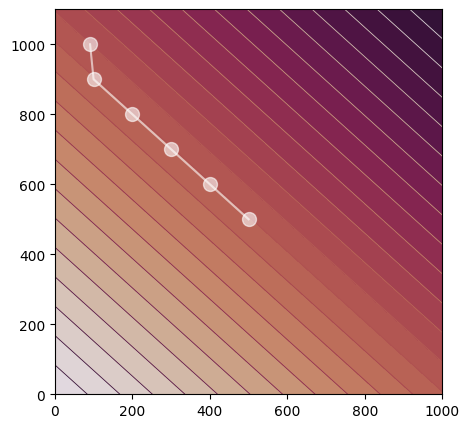

In [26]:
cs.visualize(metric=accuracy, step_size=50) 

If you wish to have multiple spaces, you can do so by creating multiple axes and passing those:

In [27]:
def tss(matrix: ConfusionMatrix) -> float:

    t_row = matrix['t']
    f_row = matrix['f']

    tp, fn = t_row[0], t_row[1]
    fp, tn = f_row[0], f_row[1]

    tp_rate = tp / (tp + fn) if (tp + fn) > 0 else 0
    fp_rate = fp / (fp + tn) if (fp + tn) > 0 else 0

    return tp_rate - fp_rate


In [28]:
def hss(matrix: ConfusionMatrix) -> float:

    t_row = matrix['t']
    f_row = matrix['f']

    tp, fn = t_row[0], t_row[1]
    fp, tn = f_row[0], f_row[1]

    numerator = 2 * ((tp * tn) - (fn * fp))
    denominator = ((tp + fn) * (fn + tn)) + ((tp + fp) * (fp + tn))

    hss = (numerator / float(denominator)) if denominator != 0 else 0

    return hss

c:\Users\Colin\Documents\Apps\Python\contingency_space\src\contingency_space\contingency_space.py:257: UserWarning: The following kwargs were not used by contour: 'edgecolor', 'linewidth'
  cs2 = ax.contour(base_x_mesh, base_y_mesh, base_z, 30, vmin=-1, vmax=1, cmap='twilight', edgecolor='black', linewidth=9, linewidths=1.7, linestyles='solid', )


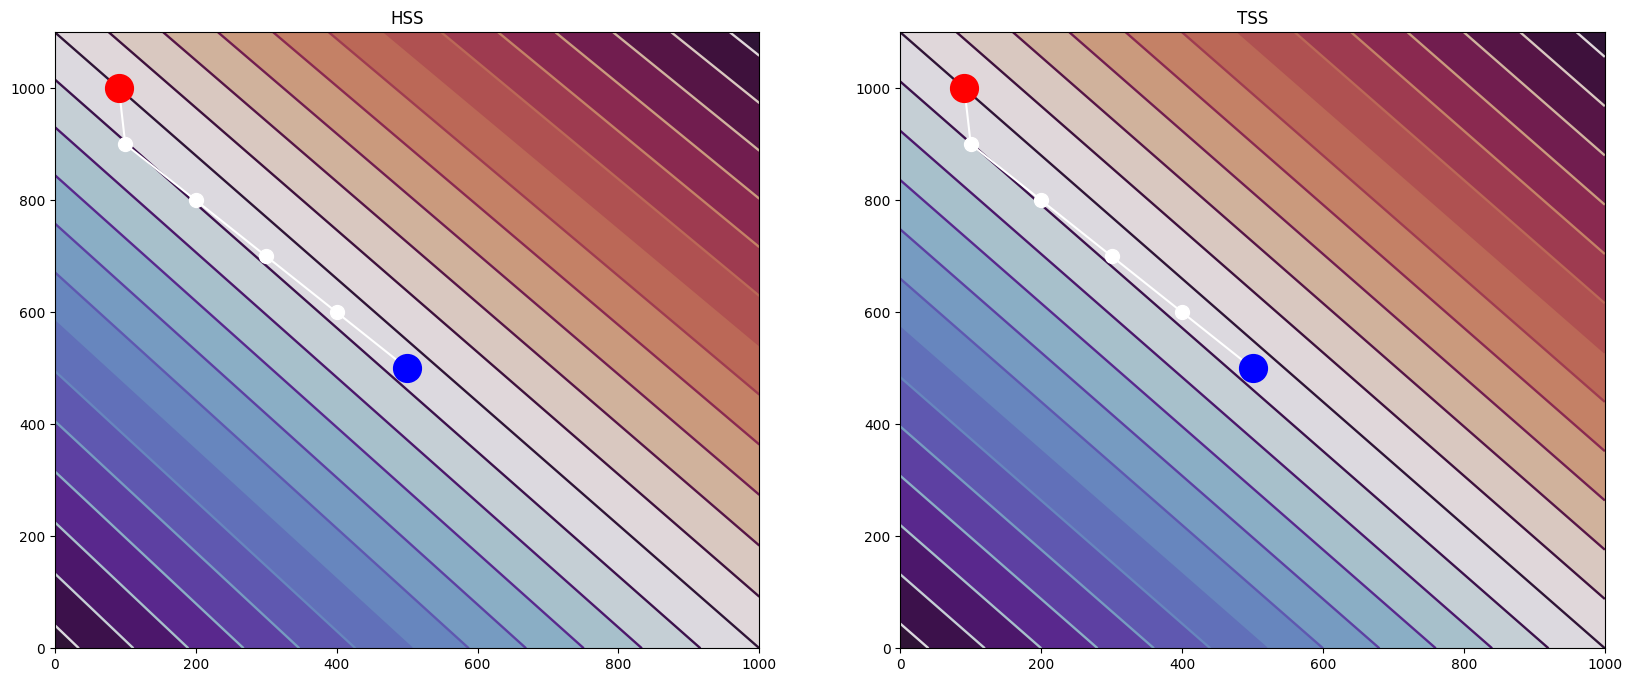

In [29]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2)
fig.set_figheight(8)
fig.set_figwidth(20)
cs.visualize(metric=hss, projection='2d', ax=axes[0], title='HSS')
cs.visualize(metric=tss, projection='2d', ax=axes[1], title='TSS')

plt.show()

You can also generate 3 dimensional plots:

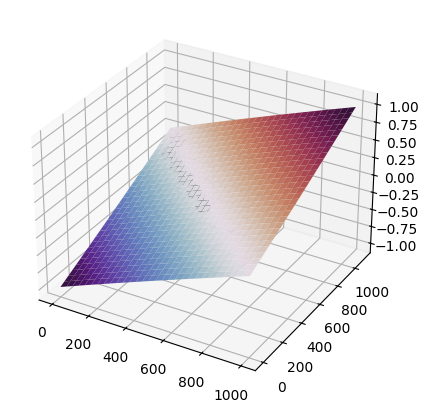

In [30]:
cs.visualize(metric=hss, projection='3d', title='3D plot of HSS')

Now that we've seen the plots generated, we can calculate the learning path:

In [33]:
print(cs.learning_path_length_2D(('1', '6')))
print(cs.learning_path_length_3D(('1', '6'), metric=hss))

0.6319468237308628
0.6664615364469326
